### If we are planning on going out to see a movie, how well can we trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

This project investigates the 2015 Fandango controversy and the aim is to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

Further reading: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re


**The Data**

We will use the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

**Exploring Fandango Displayed Scores** 

In [2]:
#Fandango Dataframe
df_fa = pd.read_csv(r"C:\Users\konch\OneDrive\Desktop\UDEMY NOTEBOOKS JOSE\06-Capstone-Project\fandango_scrape.csv")

df_fa.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [3]:
df_fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [4]:
df_fa.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Plotting the relationship between Rating and Votes**

Text(0.5, 1.0, 'Relationship between Rating and Votes')

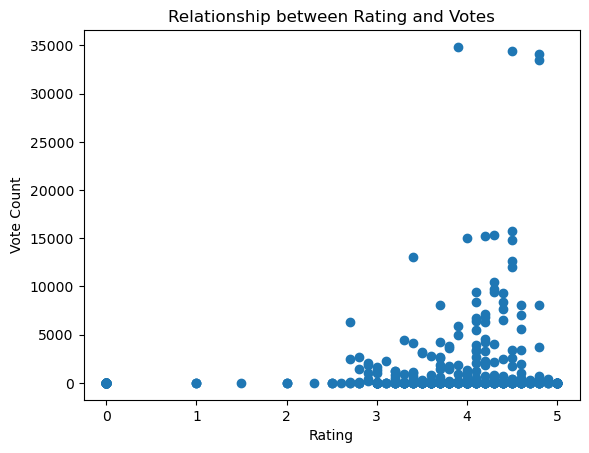

In [5]:

plt.scatter(df_fa['RATING'], df_fa['VOTES'])
plt.xlabel('Rating')
plt.ylabel('Vote Count')
plt.title('Relationship between Rating and Votes')

**Calculating the correlation between the dataframe columns**

In [6]:
df_fa.corr()

C:\Users\konch\AppData\Local\Temp\ipykernel_12424\3141767777.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fa.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Creating a 'Year' column**

In [7]:
df_fa.iloc[502]

FILM      Yesterday, Today and Tomorrow (1964)
STARS                                      0.0
RATING                                     0.0
VOTES                                        0
Name: 502, dtype: object

In [8]:
pattern = r'\((\d{4})\)'
df_fa['YEAR'] = df_fa['FILM'].str.extract(pattern).astype(int)
df_fa['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: int32

**Plotting the movies per year**

Text(0.5, 1.0, 'Number of Movies per Year')

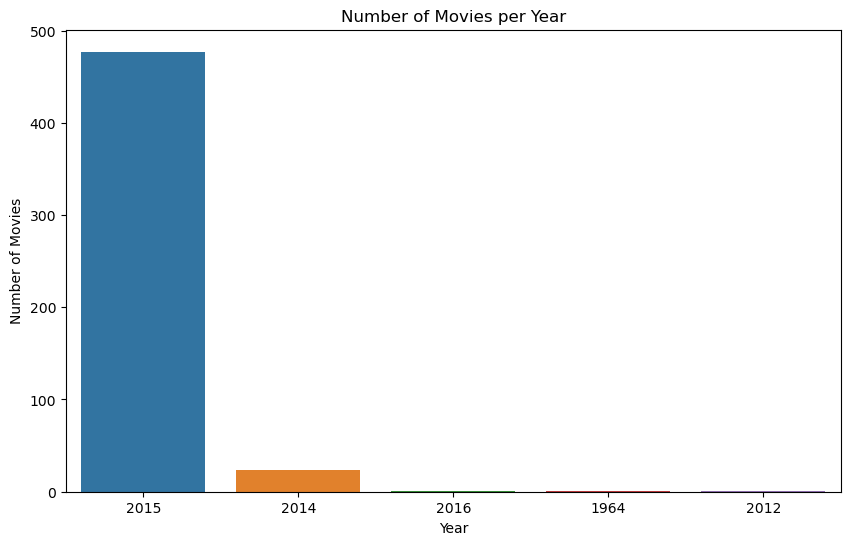

In [9]:
plt.figure(figsize=(10, 6))
year_counts = df_fa['YEAR'].value_counts().sort_values(ascending=False)
sns.countplot(data= df_fa, x= df_fa['YEAR'],order=year_counts.index)



plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Year')

**Creating a DataFrame of only reviewed films by removing any films that have zero votes**

In [10]:
df_fa = df_fa[df_fa['VOTES'] != 0]

In [11]:
df_fa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    435 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 18.7+ KB


**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

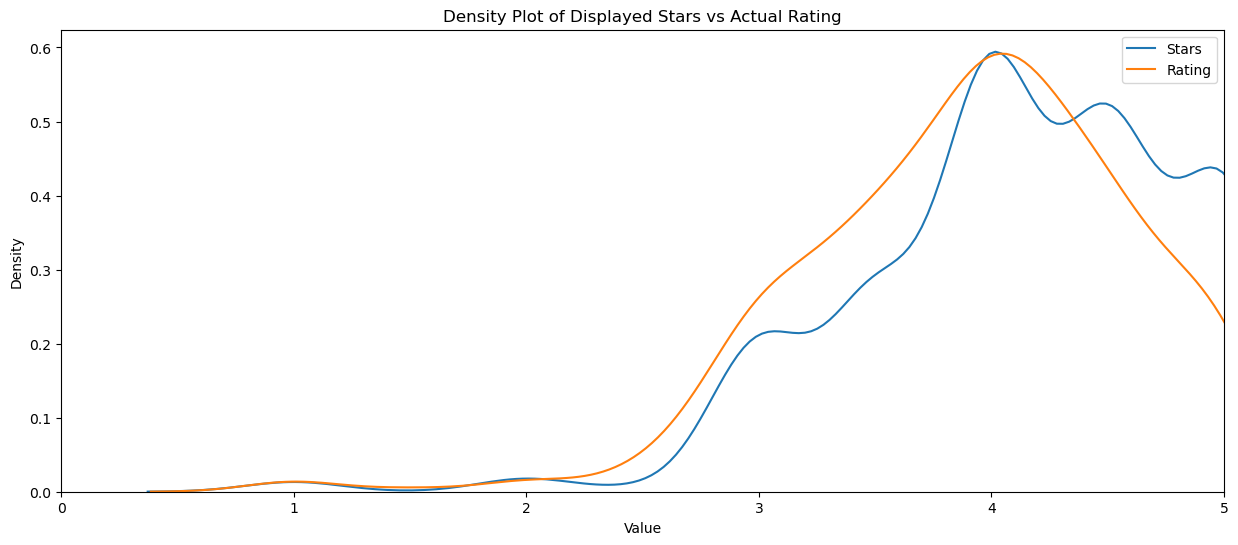

In [12]:
plt.figure(figsize=(15, 6))
sns.kdeplot(data= df_fa['STARS'], label= 'Stars')
sns.kdeplot(data= df_fa['RATING'], label= 'Rating')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0, 5)
plt.title('Density Plot of Displayed Stars vs Actual Rating')
plt.legend()


**Let's now actually quantify this discrepancy. We'll create a new column of the different between STARS displayed versus true RATING, calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [13]:
df_fa['DIFF'] = (df_fa['STARS'] - df_fa['RATING']).round(1)
df_fa.head()

,FILM,STARS,RATING,VOTES,YEAR,DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


**Plotting the measured discrepancy**

Text(0.5, 1.0, 'Number of times every rounding-up difference occurs')

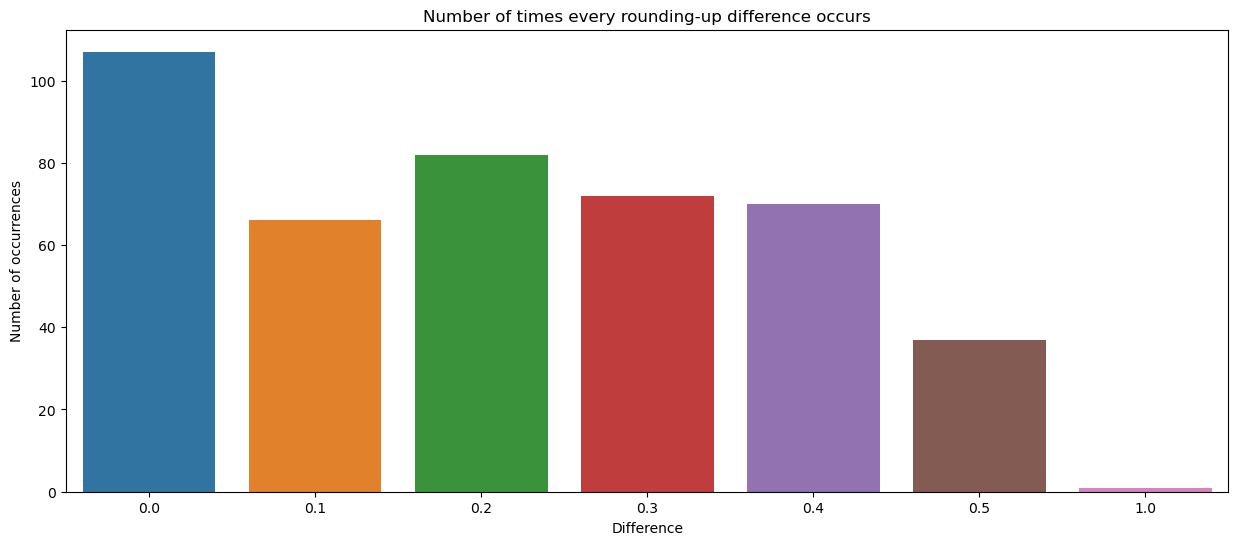

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(data= df_fa, x= df_fa['DIFF'])
plt.xlabel('Difference')
plt.ylabel('Number of occurrences')
plt.title('Number of times every rounding-up difference occurs')

We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?

In [37]:
df_fa.loc[lambda df_fa: df_fa['DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


#### SUMMARY SO FAR: It's already obvious that Fandango is purposefully displaying higher ratings than the actual ones. But let's explore how objective the original ratings are in the first place

## Comparison of Fandango Ratings to Other Sites

In [15]:
df_os = pd.read_csv(r"C:\Users\konch\OneDrive\Desktop\UDEMY NOTEBOOKS JOSE\06-Capstone-Project\all_sites_scores.csv")
df_os.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [16]:
df_os.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [17]:
df_os.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


#### ROTTEN TOMATOES

Let's look at the data from Rotten Tomatoes first. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 


Text(0.5, 1.0, 'User - Critic Rating correlation RT')

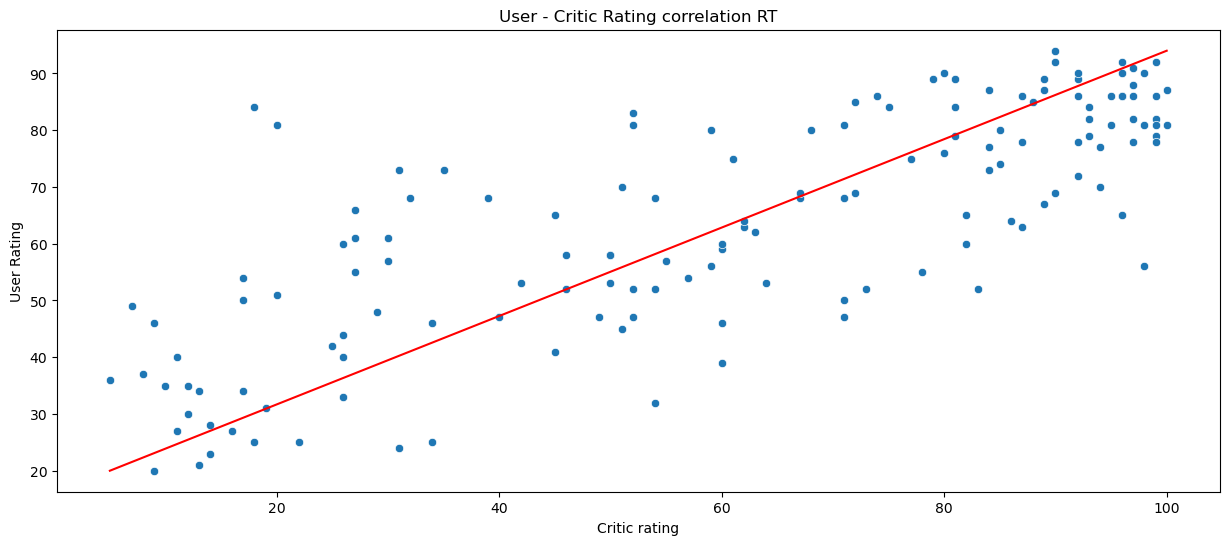

In [18]:
plt.figure(figsize=(15,6))
sns.scatterplot(data= df_os, x= df_os['RottenTomatoes'], y= df_os['RottenTomatoes_User'])
plt.plot([df_os['RottenTomatoes'].min(), df_os['RottenTomatoes'].max()], 
         [df_os['RottenTomatoes_User'].min(), df_os['RottenTomatoes_User'].max()], 
         color='red', linestyle='-')
plt.xlabel('Critic rating')
plt.ylabel('User Rating')
plt.title('User - Critic Rating correlation RT')

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

In [19]:
df_os['Rotten_Diff'] = df_os['RottenTomatoes'] - df_os['RottenTomatoes_User']
df_os.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Let's now compare the overall mean difference. 

In [20]:
df_os['Rotten_Diff_Abs'] = df_os['Rotten_Diff'].abs()


In [21]:
df_os['Rotten_Diff_Abs'].mean()

15.095890410958905

Text(0.5, 1.0, 'RT Critics Score vs RT Users Score')

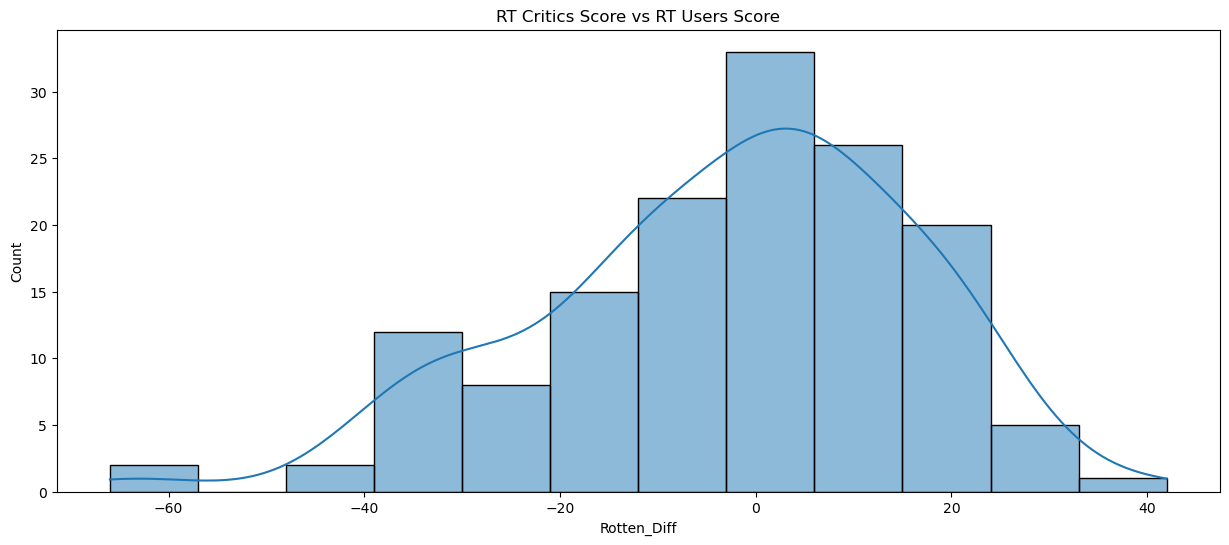

In [22]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_os, x=df_os['Rotten_Diff'], kde=True)
plt.title('RT Critics Score vs RT Users Score')




Text(0.5, 1.0, ' Absolute difference between RT Critics Score and RT Users Score')

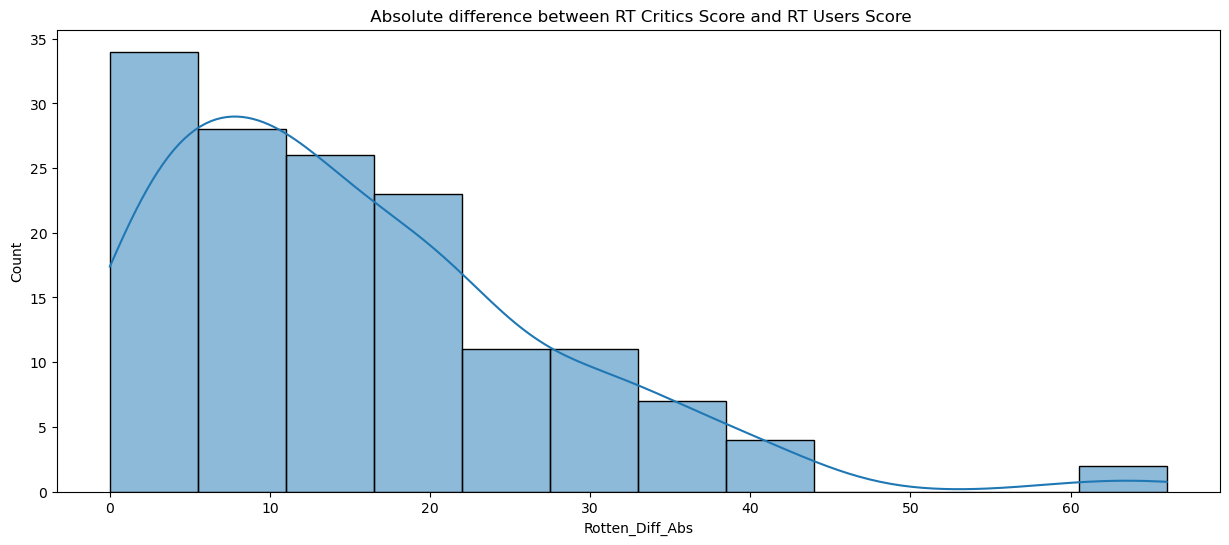

In [23]:

plt.figure(figsize= (15,6))
sns.histplot(data=df_os, x=df_os['Rotten_Diff_Abs'], kde=True)
plt.title(' Absolute difference between RT Critics Score and RT Users Score')


**Let's find out which movies are causing the largest differences**

Movies Critics Love, but Users hate

In [24]:
df_os[['FILM','Rotten_Diff']].sort_values(by= 'Rotten_Diff',ascending=False).head()

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


Movies Users Loved but Critics hated

In [25]:
df_os[['FILM','Rotten_Diff']].sort_values(by= 'Rotten_Diff',ascending=True).head()

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

Text(0.5, 1.0, 'User - Critic Rating correlation Metacritic')

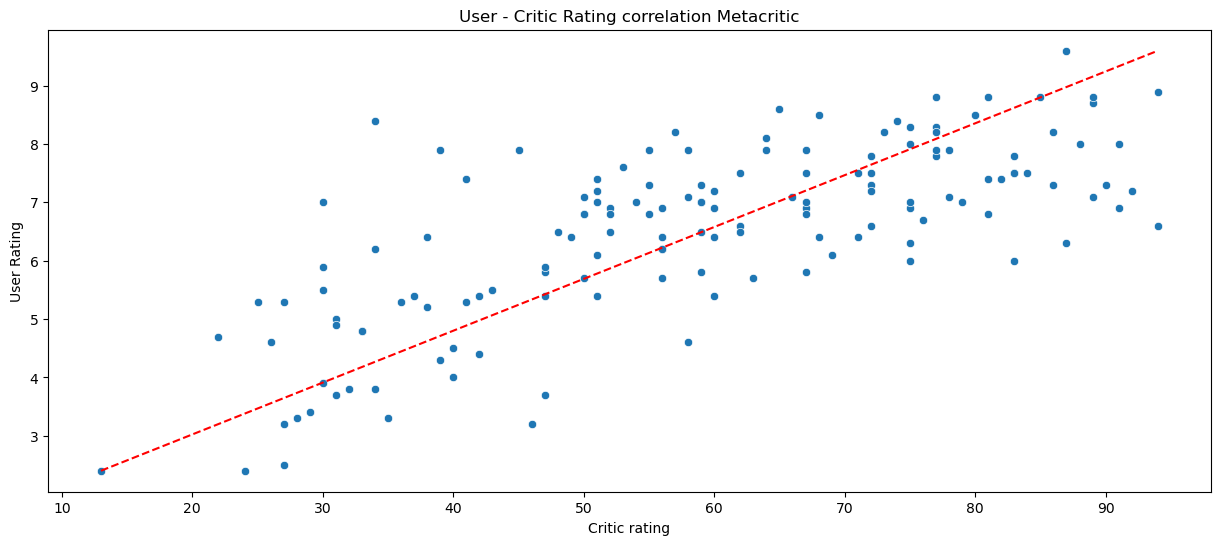

In [26]:
plt.figure(figsize=(15,6))
sns.scatterplot(data= df_os, x= df_os['Metacritic'], y= df_os['Metacritic_User'])
plt.plot([df_os['Metacritic'].min(), df_os['Metacritic'].max()], 
         [df_os['Metacritic_User'].min(), df_os['Metacritic_User'].max()], 
         color='red', linestyle='--')
plt.xlabel('Critic rating')
plt.ylabel('User Rating')
plt.title('User - Critic Rating correlation Metacritic')

## IMDB

Finally let's explore IMDB. Since both Metacritic and IMDB report back vote counts, let's analyze the most popular movies.

Text(0.5, 1.0, 'Relationship between vote counts on MetaCritic versus vote counts on IMDB')

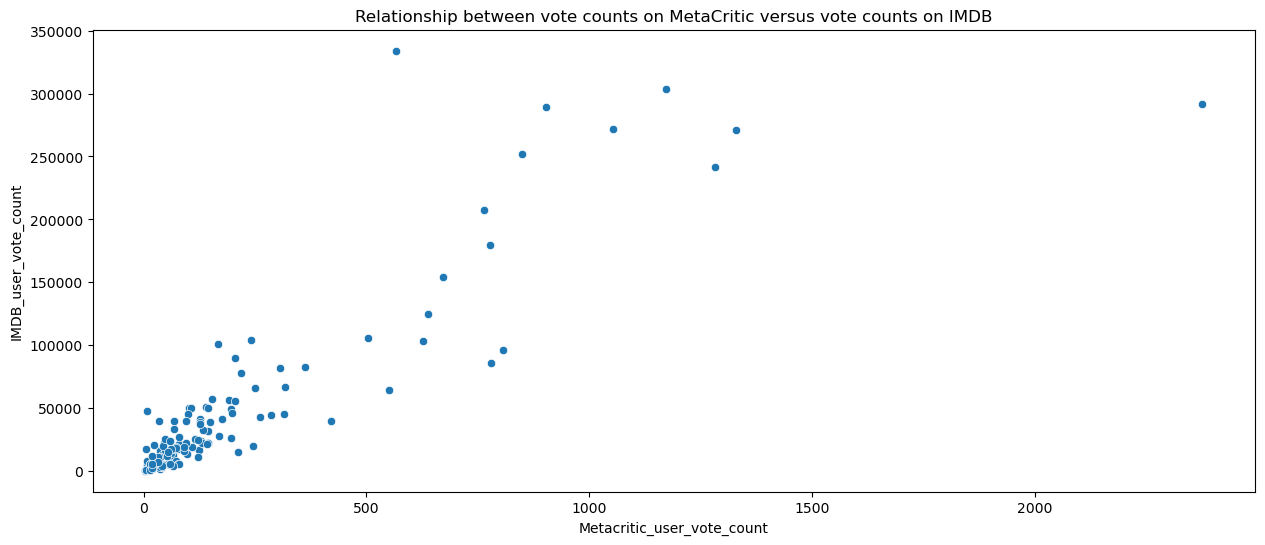

In [27]:
plt.figure(figsize = (15,6))
sns.scatterplot(data= df_os, x= df_os['Metacritic_user_vote_count'], y = df_os['IMDB_user_vote_count'])
plt.title('Relationship between vote counts on MetaCritic versus vote counts on IMDB')

There are two outliers here. What's odd is that the movie with the highest vote count on IMDB only has about 500 Metacritic ratings

In [28]:
df_os[['FILM','IMDB_user_vote_count','Metacritic_user_vote_count']].sort_values(by='IMDB_user_vote_count', ascending= False).head(1)

,FILM,IMDB_user_vote_count,Metacritic_user_vote_count
14,The Imitation Game (2014),334164,566


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

Firstly, we'll combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames.

In [29]:
df_all = df_fa.merge(df_os,how='inner',on='FILM')
df_all.head()

,FILM,STARS,RATING,VOTES,YEAR,DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_Abs
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,8


In [30]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int32  
 5   DIFF                        145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.


In [31]:
df_final = pd.DataFrame()
df_final[['Film', 'Stars_Fan', 'Rating_Fan']] = df_all[['FILM', 'STARS', 'RATING']]
df_final['RottenTomatoes'] = (df_all['RottenTomatoes'] / 20).round(1)
df_final['RottenTomatoes_User'] = (df_all['RottenTomatoes_User'] / 20).round(1)
df_final['Metacritic'] = (df_all['Metacritic'] / 20).round(1)
df_final['Metacritic_User'] = (df_all['Metacritic_User'] / 2).round(1)
df_final['IMDB'] = (df_all['IMDB'] / 2).round(1)


In [32]:
df_final.head()

,Film,Stars_Fan,Rating_Fan,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

Text(0.5, 1.0, 'Distribution of all sites')

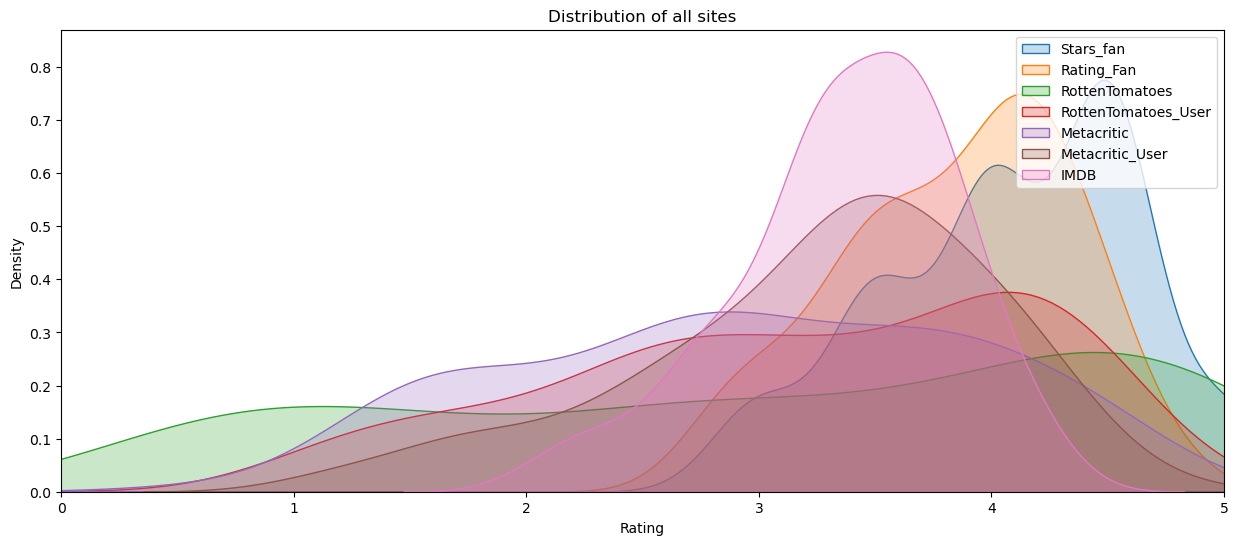

In [50]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df_final['Stars_Fan'], label = 'Stars_fan',fill= True)
sns.kdeplot(data=df_final['Rating_Fan'], label = 'Rating_Fan',fill= True)
sns.kdeplot(data=df_final['RottenTomatoes'], label = 'RottenTomatoes',fill= True)
sns.kdeplot(data=df_final['RottenTomatoes_User'], label = 'RottenTomatoes_User',fill= True)
sns.kdeplot(data=df_final['Metacritic'], label = 'Metacritic',fill= True)
sns.kdeplot(data=df_final['Metacritic_User'], label = 'Metacritic_User',fill= True)
sns.kdeplot(data=df_final['IMDB'], label = 'IMDB',fill= True)
plt.ylabel('Density')
plt.xlabel('Rating')
plt.xlim(left=0, right =5)
plt.legend()
plt.title('Distribution of all sites')


**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

Text(0.5, 1.0, 'Comparison of Fandango and Rotten Tomatoes Critics')

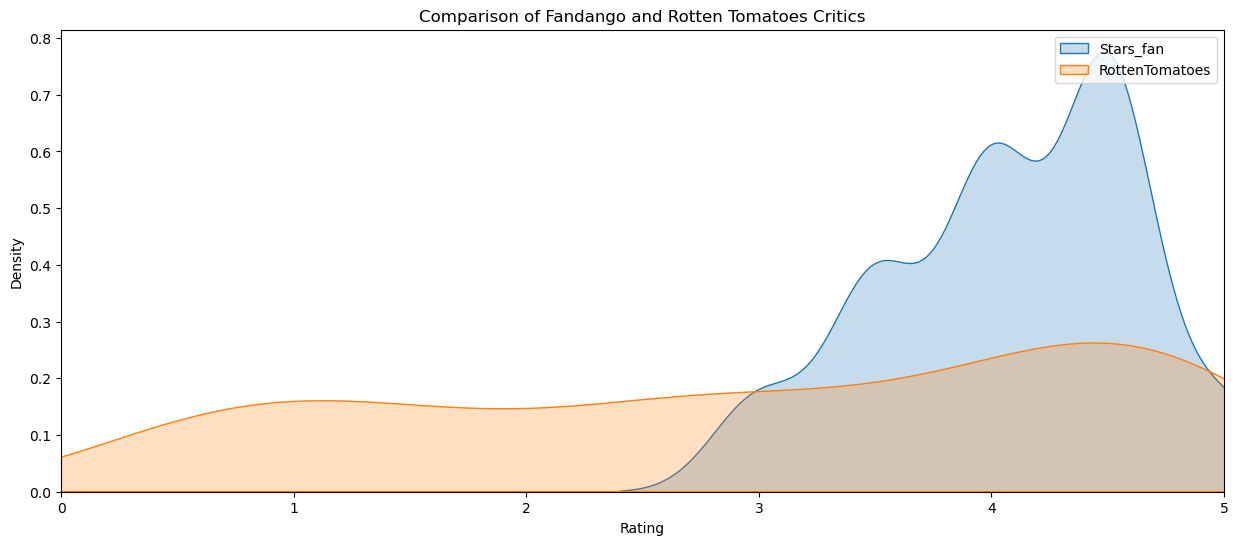

In [51]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df_final['Stars_Fan'], label = 'Stars_fan',fill= True)
sns.kdeplot(data=df_final['RottenTomatoes'], label = 'RottenTomatoes',fill= True)
plt.xlabel('Rating')
plt.xlim(left=0, right =5)
plt.ylabel('Density')
plt.legend()
plt.title('Comparison of Fandango and Rotten Tomatoes Critics')

Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. 

Let's examine the top 10 worst movies
based on the Rotten Tomatoes Critic Ratings.

In [54]:
df_final_10 = df_final.sort_values(by =['RottenTomatoes'], ascending= True).head(10)
df_final_10

,Film,Stars_Fan,Rating_Fan,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
109,The Vatican Tapes (2015),3.0,2.9,0.6,1.0,1.8,2.7,2.3
88,The Loft (2015),4.0,3.6,0.6,2.0,1.2,1.2,3.2
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8


Text(0.5, 1.0, 'Ratings for the 10 worst films by Rotten Tomatoes Critics')

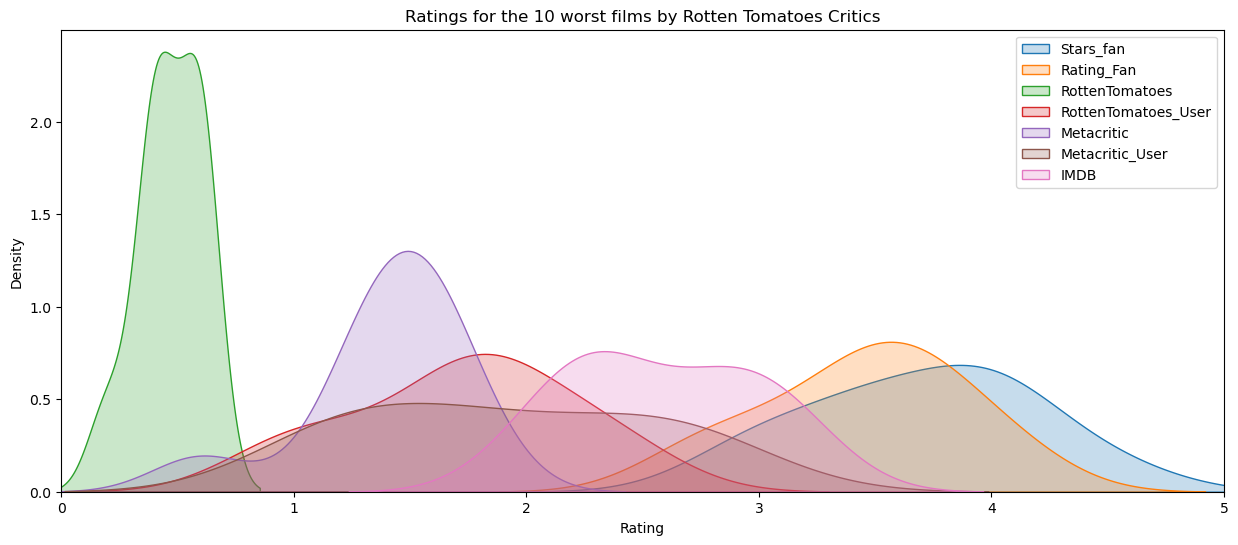

In [55]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df_final_10['Stars_Fan'], label = 'Stars_fan',fill= True)
sns.kdeplot(data=df_final_10['Rating_Fan'], label = 'Rating_Fan',fill= True)
sns.kdeplot(data=df_final_10['RottenTomatoes'], label = 'RottenTomatoes',fill= True)
sns.kdeplot(data=df_final_10['RottenTomatoes_User'], label = 'RottenTomatoes_User',fill= True)
sns.kdeplot(data=df_final_10['Metacritic'], label = 'Metacritic',fill= True)
sns.kdeplot(data=df_final_10['Metacritic_User'], label = 'Metacritic_User',fill= True)
sns.kdeplot(data=df_final_10['IMDB'], label = 'IMDB',fill= True)
plt.ylabel('Density')
plt.xlabel('Rating')
plt.xlim(left=0, right =5)
plt.legend()
plt.title('Ratings for the 10 worst films by Rotten Tomatoes Critics')

## Conclusion: Ok, I was confident this would happen but I didn't expect it would be that bad. It's obvious Fandango was consistently overrating movies that were objectively bad and therefore tricked people into buying tickets to movies they wouldn't otherwise watch.